# <span style="color:rgb(94, 155, 221); font-size: 30px; font-weight: bold; padding: 10px; display: block; width: 100%;"> ☑ Netflix Case Study

<span style="color:rgb(94, 155, 221); font-size: 24px; font-weight: bold; border-left:3px solid; padding: 10px; display: block; width: 100%;"> Problem Statement

Analyze and predict the viewership and success of movies and TV shows on a streaming platform based on various attributes such as type, title, director, cast, country, date added, reinase year, rating, duration, listed in, and description

Specifically, I want to answer the following questions and perform tasks related to this dataset:


1. Viewership and Popularity Analysis:

- What are the most popular types of content on the platform (Movies or TV Shows)?

-  Which countres contribute the most content?

- Does the release year affect the popularity of content?

2. Content Duration Analysis:

- Are there any trends in content duration over the years?

3. Genre Analysis:

- Which genres are most prevalent on the platform?

- Are there any trends in the popularity of specific genres?

4. Country Analysis:

- Do viewers have a preference for content from certain countries?

5. Predictive Modeling:

- Can we build a model to pridict the success (eg, wewership, ratings) of a movie or TV show based on its attributes?

By addressing these questions and tasks, the streaming platform can gain insights into its content library, viewer preferences

<span style="color:rgb(94, 155, 221); font-size: 24px; font-weight: bold; border-left:3px solid; padding: 10px; display: block; width: 100%;"> Regarding Dataset

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000+ movies or tv shows available on their platform, as of mid-2021, thay have over 200M Subscribers globally. This tabular dataser consists of listings of all the movies and tv shows available on Netflix, along with details such as-cast, directors, ratings, release year, duration, etc.

Description of each column in the dataset:

1. show id: A unique identifier for each show or movie.

2. type: The type of content, either "Movie" or TV Show."

3. title: The title of the movie or TV show.

4. director: The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

5. cast: The cast or actors in the movie or TV show in the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water"

6. country: The country where the movie or TV show was produced or is assocsated with

7. date_added: The date when the content was added to the streaming platform, in the forrnat "Month Day, Year"

8. release year: The year the movie or TV show was origily released.

9. rating: The content's rating, which indicates the recommended audiende age or maturity level (eg., "PD-13" or "TV-MA").

10. duration: The duration of the movie or TV show in the first entry, the duration is given an minutes (190 min") in the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season")

11. listed in: The genre or category of the content, which can help classify It (e.g., "Documentaries," "International TV Shows," "Crime TV Shows"

12. description: A brief description or synopsis of the movie or TV show, providing an overview of the pint or subject matter

<span style="color:rgb(94, 155, 221); font-size: 24px; font-weight: bold; border-left:3px solid; padding: 10px; display: block; width: 100%;"> Initiating Dataset Analysis


In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
import seaborn as sns 

In [2]:
netflix_data = pd.read_csv(r"E:\0. VS Code\netflix_titles.csv\netflix_titles.csv")

In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.shape

(8807, 12)

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
for col in netflix_data.columns:
    print(col)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [7]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix_data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
netflix_data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [11]:
for col in ["type", "title", "director", "country", "release_year", "rating",]:
    print(f"{col} has {netflix_data[col].unique()}\n\n")

type has ['Movie' 'TV Show']


title has ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']


director has ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']


country has ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States

<span style="color:rgb(94, 155, 221); font-size: 24px; font-weight: bold; border-left:3px solid; padding: 10px; display: block; width: 100%;"> Analyzing the Data

***Netflix Data Null Percentage Analysis***

Perform an analysis of null (missing) values in a dataset, specificallya dataset related to Netflix content, the column names and their corresponding null percentage, making it easy to identfy which colomn has the most missing values.

In [12]:
null_percentage_df = pd.DataFrame(netflix_data.isnull().sum()/netflix_data.shape[0]*100, columns=["Null Percentage"]).reset_index().rename(columns={"index":"Column Names"}).sort_values(by="Null Percentage", ascending=False)
# Dividing missing values by total number of rows and multiplying by 100 to get percentage of missing values

null_percentage_df

,Column Names,Null Percentage
3,director,29.908028
5,country,9.435676
4,cast,9.367549
6,date_added,0.113546
8,rating,0.045418
9,duration,0.034064
0,show_id,0.000000
1,type,0.000000
2,title,0.000000
7,release_year,0.000000


In [13]:
null_count_df = pd.DataFrame( netflix_data.isnull().sum(), columns = ["Null Count"] ).reset_index().rename(columns={"index":"Column Names"}).sort_values(by="Null Count", ascending=False)
null_count_df

,Column Names,Null Count
3,director,2634
5,country,831
4,cast,825
6,date_added,10
8,rating,4
9,duration,3
0,show_id,0
1,type,0
2,title,0
7,release_year,0


In [14]:
null_df = pd.merge(null_percentage_df, null_count_df, on="Column Names", how="inner")
null_df

,Column Names,Null Percentage,Null Count
0,director,29.908028,2634
1,country,9.435676,831
2,cast,9.367549,825
3,date_added,0.113546,10
4,rating,0.045418,4
5,duration,0.034064,3
6,show_id,0.000000,0
7,type,0.000000,0
8,title,0.000000,0
9,release_year,0.000000,0


***Adviced to go by this way as you can easily correct any error in the code***

In [15]:
# Count of missing values in each column
null_count = netflix_data.isnull().sum()   

# Percentage of missing values in each column
null_percentage = netflix_data.isnull().sum()/netflix_data.shape[0]*100

# Creating a dataframe for missing values percentage
null_percentage_df = pd.DataFrame(null_percentage, columns=["Null Percentage"]).reset_index().rename(columns={"index":"Column Names"}).sort_values(by="Null Percentage", ascending=False)  

# Creating a dataframe for missing values count
null_count_df = pd.DataFrame(null_count, columns=["Null Count"]).reset_index().rename(columns={"index":"Column Names"}).sort_values(by="Null Count", ascending=False)   

# Merging both dataframes
null_df = pd.merge(null_percentage_df, null_count_df, on="Column Names", how="inner")   

null_df

,Column Names,Null Percentage,Null Count
0,director,29.908028,2634
1,country,9.435676,831
2,cast,9.367549,825
3,date_added,0.113546,10
4,rating,0.045418,4
5,duration,0.034064,3
6,show_id,0.000000,0
7,type,0.000000,0
8,title,0.000000,0
9,release_year,0.000000,0


The high percentage of missing values in the "director" and "cast" columns may impact certain analysis or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete.

***Imputation of Missing Values in Netflix Dataset***

Missing values in selected columns in Netflix data are imputed with the value "Unknown". The colomns chosen for imputation include: director, country, cast, rating and duration.

In [16]:
columns_to_impute = ["director", "country", "cast", "rating", "duration"]
for col in columns_to_impute:
    netflix_data[col].fillna("Unknown", inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2020\743178624.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data[col].fillna("Unknown", inplace=True)


In [17]:
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

***Segmentation of Netflix Data sets into TV Shows and Movies***

The Netflix dataset is segmented into two distinct subsets, TV shows and Movies. 

This segmentation is based on the "type" column, which indicates whether a given entry is "TV Show" or "Movie".

In [18]:
netflix_data.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

***Finding the earliest and latest Movies and TV shows on Netflix***


In [19]:
# Slicing data using the Movie title
movie_df = netflix_data[netflix_data["type"] == "Movie"]

oldest_movie = movie_df[movie_df['release_year'] == movie_df["release_year"].min()]

latest_movie = movie_df[movie_df['release_year'] == movie_df["release_year"].max()]

In [20]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [21]:
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [22]:
latest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Unknown,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",Unknown,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,s1426,Movie,Creating The Queen's Gambit,Unknown,Unknown,United States,"January 8, 2021",2021,TV-14,14 min,Documentaries,A fascinating character. Exquisite sets. A wig...
1431,s1432,Movie,Stuck Apart,Unknown,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,"January 8, 2021",2021,TV-MA,97 min,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol..."
1436,s1437,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez","Juan Sebastián Gutiérrez, Pablo Cano, Pablo Me...",Unknown,"January 6, 2021",2021,TV-MA,76 min,"Documentaries, International Movies, Music & M...","The irrepressible Ratones Paranoicos, Argentin..."
1466,s1467,Movie,The Minimalists: Less Is Now,Unknown,Unknown,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...


In [23]:
# Slicing data using the TV Show title
tv_shows_df = netflix_data[netflix_data["type"] == "TV Show"]

oldest_tv_shows = tv_shows_df[tv_shows_df['release_year'] == tv_shows_df["release_year"].min()]

latest_tv_shows = tv_shows_df[tv_shows_df['release_year'] == tv_shows_df["release_year"].max()]

In [24]:
tv_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [25]:
oldest_tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown,Unknown,Unknown,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [26]:
latest_tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,s1461,TV Show,Monarca,Unknown,"Irene Azuela, Juan Manuel Bernal, Osvaldo Bena...",Mexico,"January 1, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...","After 20 years, Ana María returns to Mexico an..."
1551,s1552,TV Show,Hilda,Unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States","December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1696,s1697,TV Show,Polly Pocket,Unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland","November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
2920,s2921,TV Show,Love Is Blind,Unknown,"Nick Lachey, Vanessa Lachey",United States,"February 13, 2020",2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...


***Finding top 5 popular genres on Netflix***


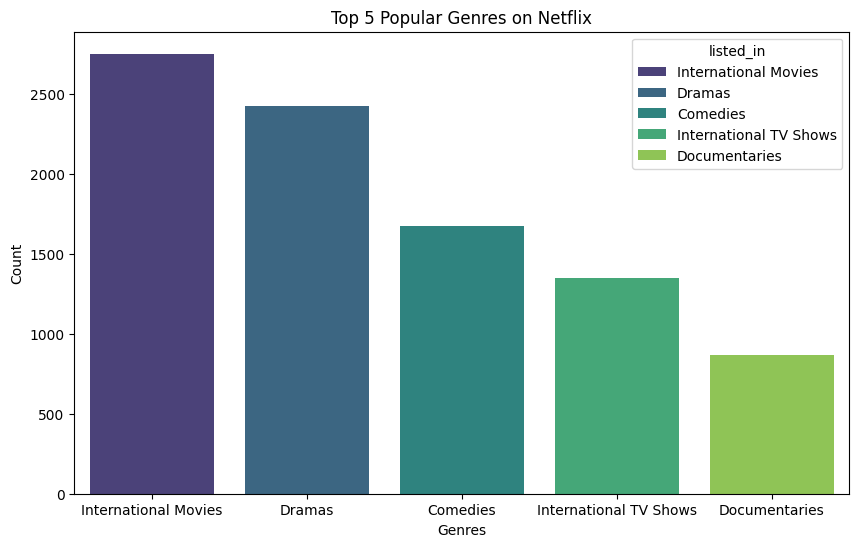

In [27]:
# Slicing the listed in colomn to get the genres of the movies and TV shows
# Splitting the genres with (, ) 
# Exploding each records into different colomns
# And counting the number of times each genre appears
genre_count = netflix_data["listed_in"].str.split(', ').explode().value_counts() 
genre_count

# Plotting the top 5 popular genres on Netflix
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.head().index, y=genre_count.head().values, hue=genre_count.head().index, palette="viridis", legend=True)
# Using .head() to get the top 5 genres
# Using .index to get the genre names and .values to get the count of each genre 
plt.title("Top 5 Popular Genres on Netflix")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

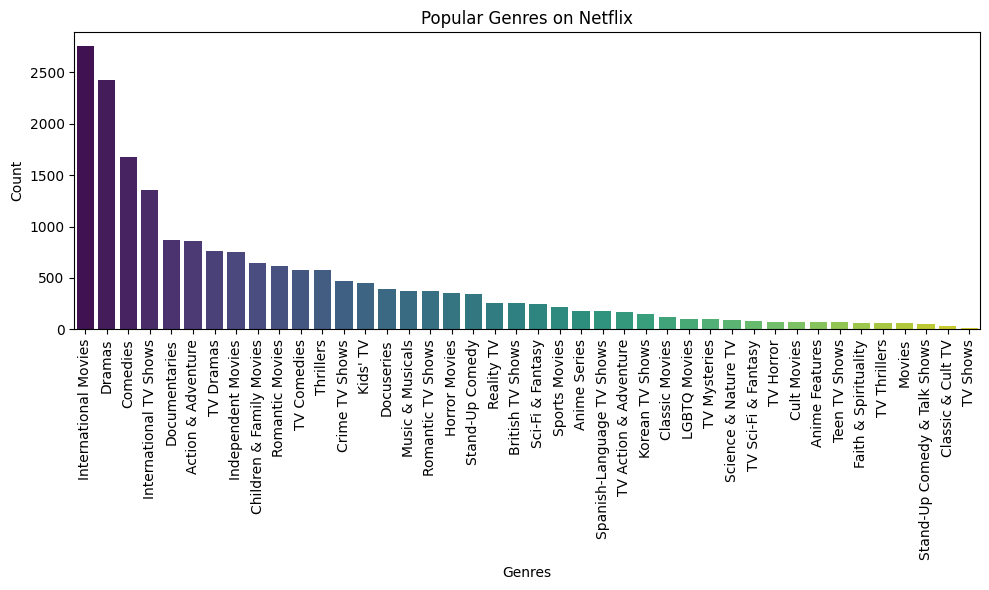

In [28]:
# Plotting the popular genres on Netflix without using .head()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, hue=genre_count.index, palette="viridis")
plt.title("Popular Genres on Netflix")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Above we can see the top 5 most popular genre in the dataset, based on the number of titles available in netflix.

In [29]:
# Finding the lastest record in the dataset with respect to the release year using iloc() function
latest_record = netflix_data.iloc[netflix_data["release_year"].idxmax()]
latest_record

show_id                                                        s2
type                                                      TV Show
title                                               Blood & Water
director                                                  Unknown
cast            Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
country                                              South Africa
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                2 Seasons
listed_in         International TV Shows, TV Dramas, TV Mysteries
description     After crossing paths at a party, a Cape Town t...
Name: 1, dtype: object

In [30]:
# Finding the oldest record in the dataset with respect to the release year using iloc() function
oldest_record = netflix_data.iloc[netflix_data["release_year"].idxmin()]
oldest_record

show_id                                                     s4251
type                                                      TV Show
title                           Pioneers: First Women Filmmakers*
director                                                  Unknown
cast                                                      Unknown
country                                                   Unknown
date_added                                      December 30, 2018
release_year                                                 1925
rating                                                      TV-14
duration                                                 1 Season
listed_in                                                TV Shows
description     This collection restores films from women who ...
Name: 4250, dtype: object

In [31]:
netflix_data.sort_values(by="release_year", ascending=False, inplace=True)


In [32]:
movie_df.sort_values(by="release_year", ascending=False, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2020\284645024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.sort_values(by="release_year", ascending=False, inplace=True)


In [33]:
recent_movies_data = movie_df[['title', 'type', 'release_year', 'country', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
recent_movies_data

title                                                                                                                                              My Heroes Were Cowboys
type                                                                                                                                                                Movie
release_year                                                                                                                                                         2021
country                                                                                                                                                           Unknown
description     Robin Wiltshire's painful childhood was rescued by Westerns. Now he lives on the frontier of his dreams, training the horses he loves for the big screen.
Name: 45, dtype: object

<span style="color:rgb(94, 155, 221); font-size: 24px; font-weight: bold; border-left:3px solid; padding: 10px; display: block; width: 100%;"> Visualizing the Data

***Data Types Distribution of Netflix Dataset***

Specifically, this provides an insights into the number of coloumns in the dataset that belongs to each data type category (i.e., object, float, int, etc.)

In [34]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [35]:
data_types_counts = netflix_data.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values, hole=0.5)])
fig.update_layout(title="Data Types Distribution in Netflix Dataset", width=500, height=500)
fig.show()

***Netflix Content Release Year Distribution***

Generates a histogram using the Plotly Express Library to visualize the distribution of Netflix based on the release year. Each bar in the histrogram represents the count of content items released in the particular year.  

In [36]:
fig = px.histogram(netflix_data, x="release_year", title="Release Year Distribution in Netflix Dataset")
# Update the layout and add boxplot
fig.update_layout(bargap=0.1, bargroupgap=0.01, xaxis_title="Release Year", yaxis_title="Count")
fig.show()

***Netflix Content by Country Distribution using Box Plot***

Creates a Histogram plot using Plotly Express Library (px) to visualize the distribution of Netflix Content by Country. I have used the "Country" coloumn on Y-Axis. Additionally, the plot includes a box plot marginals, which displays summary statistics (such as Quartiles and Outliers) for distribution of content within each country. 

In [37]:
ax = px.histogram(netflix_data, x="release_year", y="country", marginal="box", title="Countrywise Movie Release Distribution in Netflix Dataset")
ax.update_layout(bargap=0.01, bargroupgap=0.01, xaxis_title="Release Year", yaxis_title="Countries")
ax.show()

***Analysis of Netflix Content Categories***

Performs an analysis of content categories within the Netflix dataset. It aims to provide insights into the distribution and popularity of different content categories.

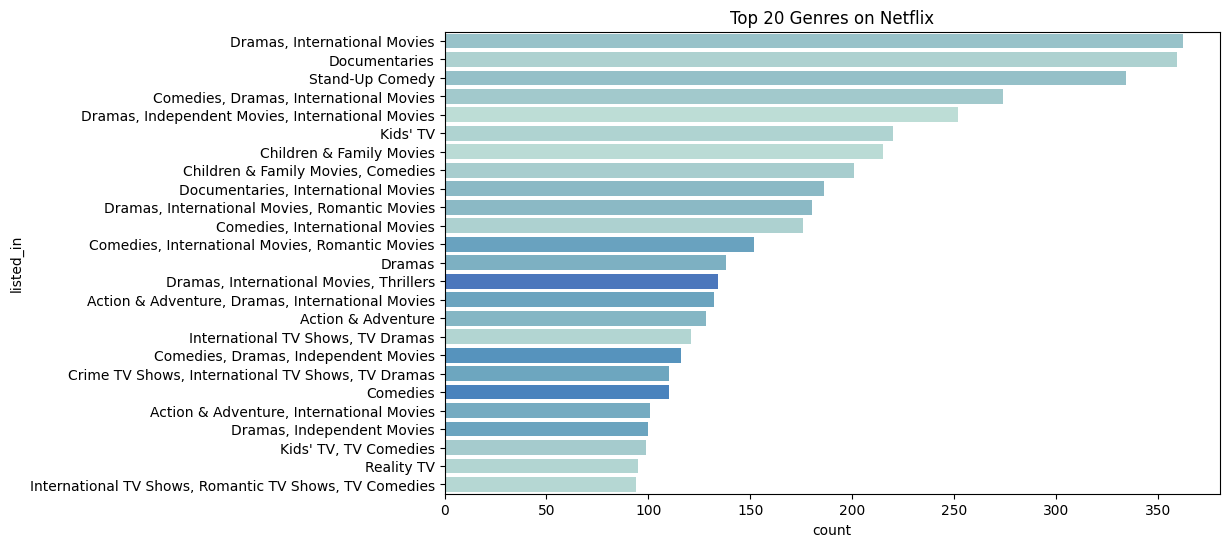

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=netflix_data, y=netflix_data["listed_in"], hue=netflix_data["listed_in"], order=netflix_data["listed_in"].value_counts().index[0:25], palette="icefire", legend=False)
ax.bar_label(ax.containers[0])
plt.title("Top 20 Genres on Netflix")
plt.show()

# Miscellaneous


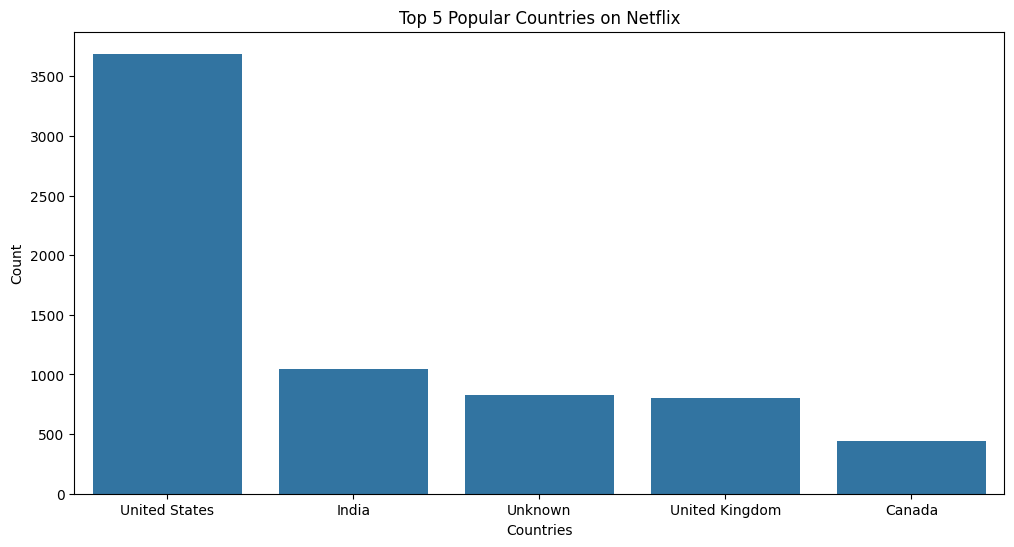

In [39]:
# Finding out Top 5 Popular Countries on Netflix

# Splitting the country column
netflix_data["countries"] = netflix_data["country"].apply(lambda x: x.split(", "))
netflix_data["countries"].head()

# Creating a list of all countries
all_countries = []
for country in netflix_data["countries"]:
    all_countries.extend(country)

# Counting the frequency of each country
country_count = pd.Series(all_countries).value_counts()

# Plotting the top 5 countries
plt.figure(figsize=(12,6))
sns.barplot(x=country_count.head().index, y=country_count.head().values)
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title("Top 5 Popular Countries on Netflix")
plt.show()

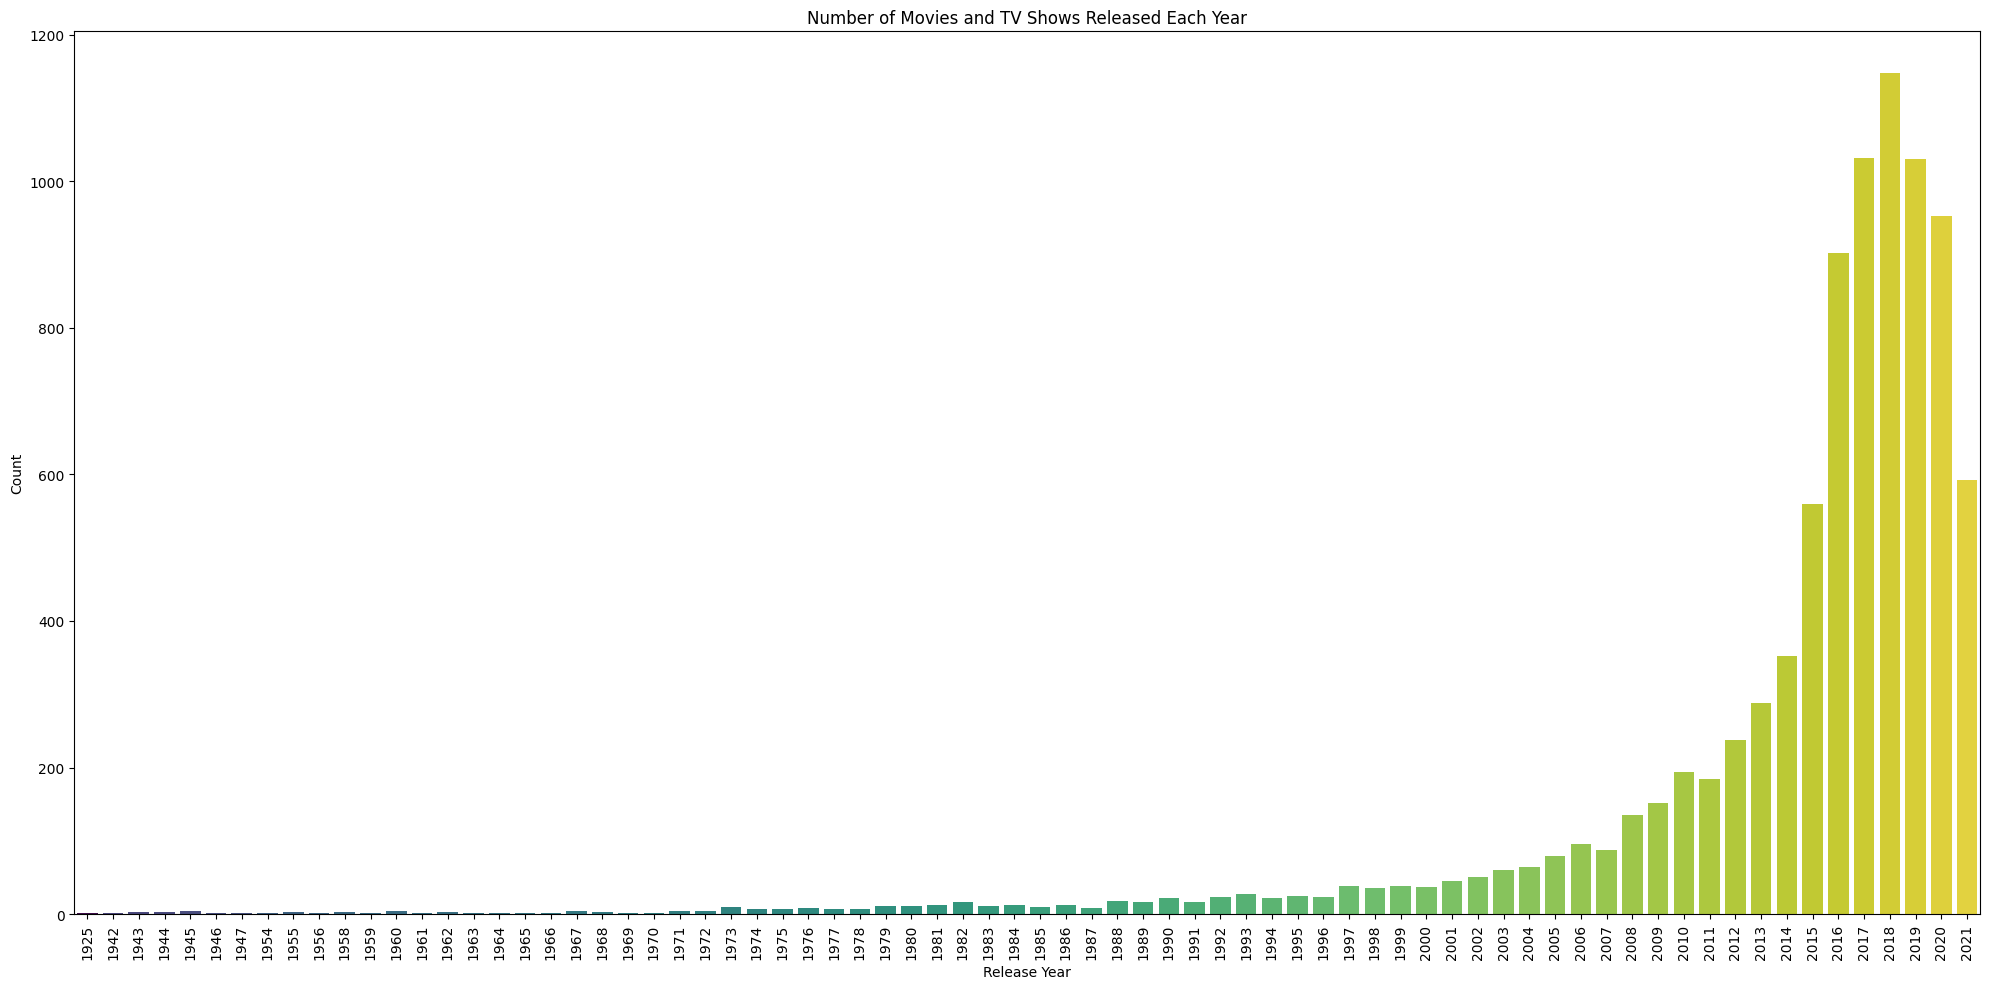

In [40]:
# Plotting the number of movies and TV shows released each year
plt.figure(figsize=(20, 10))
sns.countplot(x="release_year", hue="release_year", data=netflix_data, legend=False, palette="viridis")
plt.title("Number of Movies and TV Shows Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()